# Import necessary libraries

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [41]:
file_path = '2023-PMR-2nd-Semester-Department-of-Agriculture.xlsx'
data = pd.read_excel(file_path)
data

,Code (PAP),Procurement Project,PMO/\nEnd-User,Is this an Early Procurement Activity?,Mode of Procurement,Actual Procurement Activity,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,List of Invited Observers,Date of Receipt of Invitation,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,(Explaining changes from the APP)
0,NaN,NaN,NaN,NaN,NaN,Pre-Proc Conference,Ads/Post of IB,Pre-bid Conf,Eligibility Check,Sub/Open of Bids,...,MOOE,CO,NaN,Pre-bid Conf,Eligibility Check,Sub/Open of Bids,Bid Evaluation,Post Qual,Delivery/ Completion/ Acceptance (If applicable),NaN
1,COMPLETED PROCUREMENT ACTIVITIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COMPETITIVE BIDDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,028-23,Supply And Delivery Of Google Workspace,ICTS-NOMD,NO,Competitive Bidding,2023-05-11 00:00:00,2023-04-21 00:00:00,2023-04-28 00:00:00,2023-05-18 00:00:00,2023-05-18 00:00:00,...,1082966.18,0,"PCAF, COA, PCCI, CCWII",30-Apr-202317,-May-202317,-May-2023,NaN,NaN,NaN,NaN
4,018-23,Supply And Delivery Of Various ICT Equipment,ICTS-NOMD,NO,Competitive Bidding,2023-03-28 00:00:00,2023-02-21 00:00:00,2023-03-02 00:00:00,2023-03-28 00:00:00,2023-03-28 00:00:00,...,548000,0,"PCAF, COA, PCCI, CCWII",2023-02-28 00:00:00,2023-03-07 00:00:00,2023-03-07 00:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,Total Alloted Budget of Procurement Activities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,Total Contract Price of Procurement Actitvites...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data.head(10)

,Code (PAP),Procurement Project,PMO/\nEnd-User,Is this an Early Procurement Activity?,Mode of Procurement,Actual Procurement Activity,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,List of Invited Observers,Date of Receipt of Invitation,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,(Explaining changes from the APP)
0,NaN,NaN,NaN,NaN,NaN,Pre-Proc Conference,Ads/Post of IB,Pre-bid Conf,Eligibility Check,Sub/Open of Bids,...,MOOE,CO,NaN,Pre-bid Conf,Eligibility Check,Sub/Open of Bids,Bid Evaluation,Post Qual,Delivery/ Completion/ Acceptance (If applicable),NaN
1,COMPLETED PROCUREMENT ACTIVITIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COMPETITIVE BIDDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,028-23,Supply And Delivery Of Google Workspace,ICTS-NOMD,NO,Competitive Bidding,2023-05-11 00:00:00,2023-04-21 00:00:00,2023-04-28 00:00:00,2023-05-18 00:00:00,2023-05-18 00:00:00,...,1082966.18,0,"PCAF, COA, PCCI, CCWII",30-Apr-202317,-May-202317,-May-2023,NaN,NaN,NaN,NaN
4,018-23,Supply And Delivery Of Various ICT Equipment,ICTS-NOMD,NO,Competitive Bidding,2023-03-28 00:00:00,2023-02-21 00:00:00,2023-03-02 00:00:00,2023-03-28 00:00:00,2023-03-28 00:00:00,...,548000,0,"PCAF, COA, PCCI, CCWII",2023-02-28 00:00:00,2023-03-07 00:00:00,2023-03-07 00:00:00,NaN,NaN,NaN,NaN
5,003-23,Lease Of Photocopying Machine For The DA For C...,ICTS-NOMD,NO,Competitive Bidding,2023-03-17 00:00:00,2023-04-05 00:00:00,2023-04-25 00:00:00,2023-05-08 00:00:00,2023-05-08 00:00:00,...,2685375,0,"PCAF, COA, PCCI, CCWII",2023-10-04 00:00:00,2023-11-06 00:00:00,2023-11-06 00:00:00,NaN,NaN,NaN,NaN
6,032-23,Hiring Of Service Provider For The Conduct Of ...,ICTS-NOMD,NO,Competitive Bidding,2023-03-17 00:00:00,2023-05-03 00:00:00,2023-05-10 00:00:00,2023-05-26 00:00:00,2023-05-26 00:00:00,...,5735500,0,"PCAF, COA, PCCI, CCWII",4-May-202323,-May-202323,-May-2023,NaN,NaN,NaN,NaN
7,026-23,"Supply And Delivery, Installation And Configur...",ICTS-NOMD,NO,Competitive Bidding,2023-05-10 00:00:00,2023-05-03 00:00:00,2023-05-19 00:00:00,2023-05-26 00:00:00,2023-05-29 00:00:00,...,5978000,0,"PCAF, COA, PCCI, CCWII",4-May-202323,-May-202323,-May-2023,NaN,NaN,NaN,NaN
8,027-23,"Supply, Delivery, Installation And Configurati...",ICTS-NOMD,NO,Competitive Bidding,2023-02-23 00:00:00,2023-05-03 00:00:00,2023-05-10 00:00:00,2023-05-26 00:00:00,2023-05-26 00:00:00,...,14798,0,"PCAF, COA, PCCI, CCWII",4-May-202323,-May-202323,-May-2023,NaN,NaN,NaN,NaN
9,025-23,One (1) Year Network Facility Maintenance (UCM...,ICTS-NOMD,NO,Competitive Bidding,2023-02-23 00:00:00,2023-05-03 00:00:00,2023-05-10 00:00:00,2023-05-26 00:00:00,2023-05-26 00:00:00,...,6978000,0,"PCAF, COA, PCCI, CCWII",4-May-202323,-May-202323,-May-2023,NaN,NaN,NaN,NaN


In [43]:
data.tail(10)

,Code (PAP),Procurement Project,PMO/\nEnd-User,Is this an Early Procurement Activity?,Mode of Procurement,Actual Procurement Activity,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,List of Invited Observers,Date of Receipt of Invitation,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,(Explaining changes from the APP)
439,23-1503,Lease of Venue Including Food and Accommodatio...,4K's Program,NO,NP-53.10 Lease of Real Property and Venue,NaN,NaN,NaN,NaN,NaN,...,817500,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,23-1698,Lease of Venue Including Food and Accommodatio...,NUPAP,NO,NP-53.10 Lease of Real Property and Venue,NaN,NaN,NaN,NaN,NaN,...,840000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,23-1429,"Food provision for the DA 2023 Retirees, Offic...",Personnel,NO,NP-53.9 - Small Value Procurement,NaN,NaN,NaN,NaN,NaN,...,49200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,23-1606,Agency to Agency Agreement Between the DA and ...,Office of the Undersecretary for Special Conce...,NO,NP-53.5 Agency-to-Agency,NaN,NaN,NaN,NaN,NaN,...,262762.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,Total Alloted Budget of Procurement Activities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,Total Contract Price of Procurement Actitvites...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,Total Savings (Total Alloted Budget - Total Co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleansing/Preprocessing

In [44]:
data_cleaned = data.dropna(axis=1, how='all')

# Convert 'Contract Cost (PhP)' and 'ABC (PhP)' to numeric by removing any commas or non-numeric characters

In [45]:
data_cleaned['Contract Cost (PhP)'] = pd.to_numeric(data_cleaned['Contract Cost (PhP)'].astype(str).str.replace(',', ''), errors='coerce')
data_cleaned['ABC (PhP)'] = pd.to_numeric(data_cleaned['ABC (PhP)'].astype(str).str.replace(',', ''), errors='coerce')

<ipython-input-45-cb623e936d48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Contract Cost (PhP)'] = pd.to_numeric(data_cleaned['Contract Cost (PhP)'].astype(str).str.replace(',', ''), errors='coerce')
<ipython-input-45-cb623e936d48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ABC (PhP)'] = pd.to_numeric(data_cleaned['ABC (PhP)'].astype(str).str.replace(',', ''), errors='coerce')


# Fill missing values in numerical columns with the mean

In [47]:
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns

# Optimization techniques

In [49]:
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

# Encode categorical columns

In [50]:
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# Define predictors and target variable

In [51]:
X = data_cleaned.drop(columns=['Contract Cost (PhP)'])
y = data_cleaned['Contract Cost (PhP)']

# Split the data into training and test sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Proposed models

In [53]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)

# Train both models

In [54]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [55]:
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# Use the test data for predicition

In [57]:
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

 # Calculate regression metrics for evaluation and display the results

In [61]:
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)
print("Linear Regression Metrics:")
print(f"RMSE: {linear_rmse}, MAE: {linear_mae}, R-squared: {linear_r2}")

Linear Regression Metrics:
RMSE: 3354217.5808456833, MAE: 791939.1896506152, R-squared: 0.3125804507005


In [71]:
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)
print("\nDecision Tree Metrics:")
print(f"RMSE: {tree_rmse}, MAE: {tree_mae}, R-squared: {tree_r2}")


Decision Tree Metrics:
RMSE: 3838935.9480725788, MAE: 619956.4278780057, R-squared: 0.09954679337558026


# Hyperparameter tuning for Decision Tree

In [63]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Grid Search

In [64]:
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_tree_model_grid = grid_search.best_estimator_
print("\nBest parameters from Grid Search:", grid_search.best_params_)
print("Best Grid Search RMSE:", np.sqrt(-grid_search.best_score_))


Best parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 15}
Best Grid Search RMSE: 13210421.703302717


# Random Search

In [65]:
random_search = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_tree_model_random = random_search.best_estimator_
print("\nBest parameters from Random Search:", random_search.best_params_)
print("Best Random Search RMSE:", np.sqrt(-random_search.best_score_))


Best parameters from Random Search: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Best Random Search RMSE: 13223093.881748708


# Visualizations

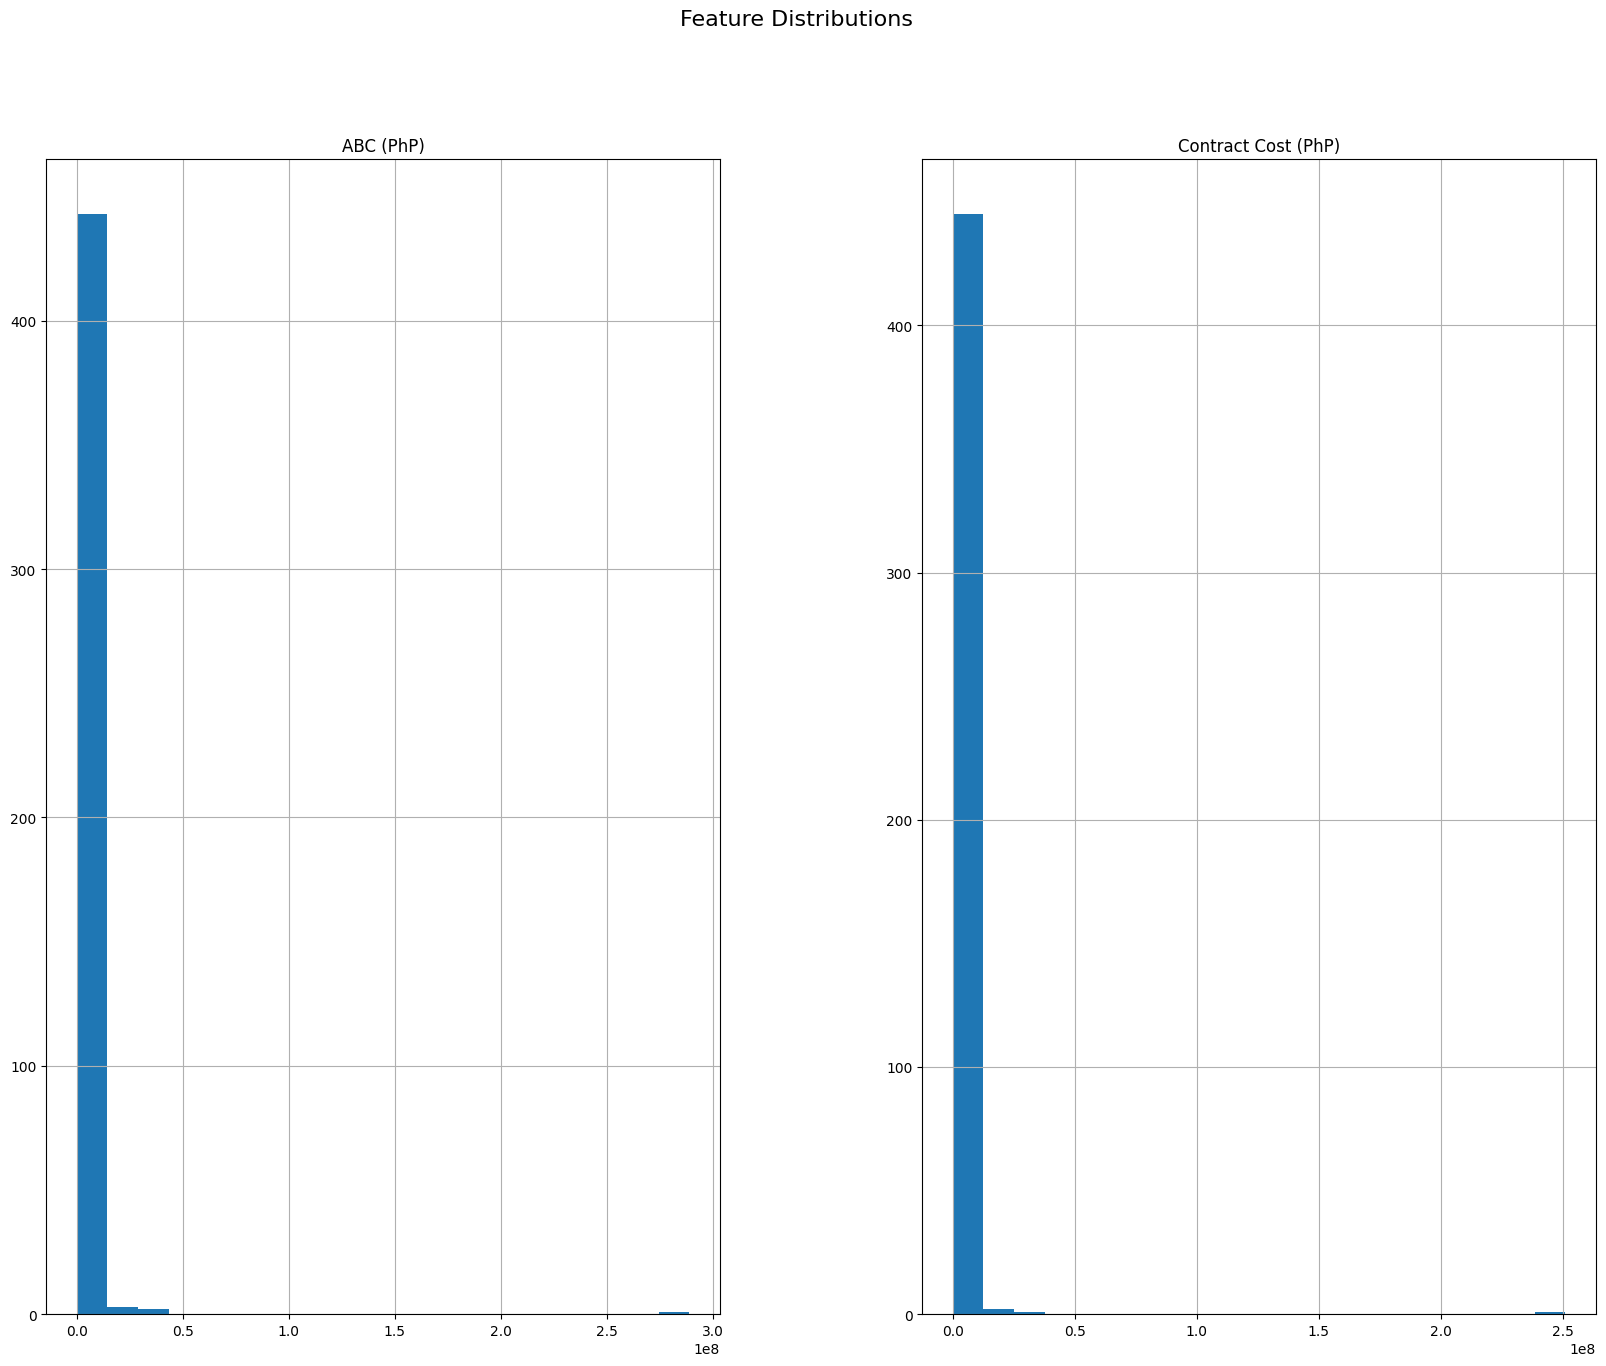

In [66]:
data_cleaned.hist(bins=20, figsize=(20, 15))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

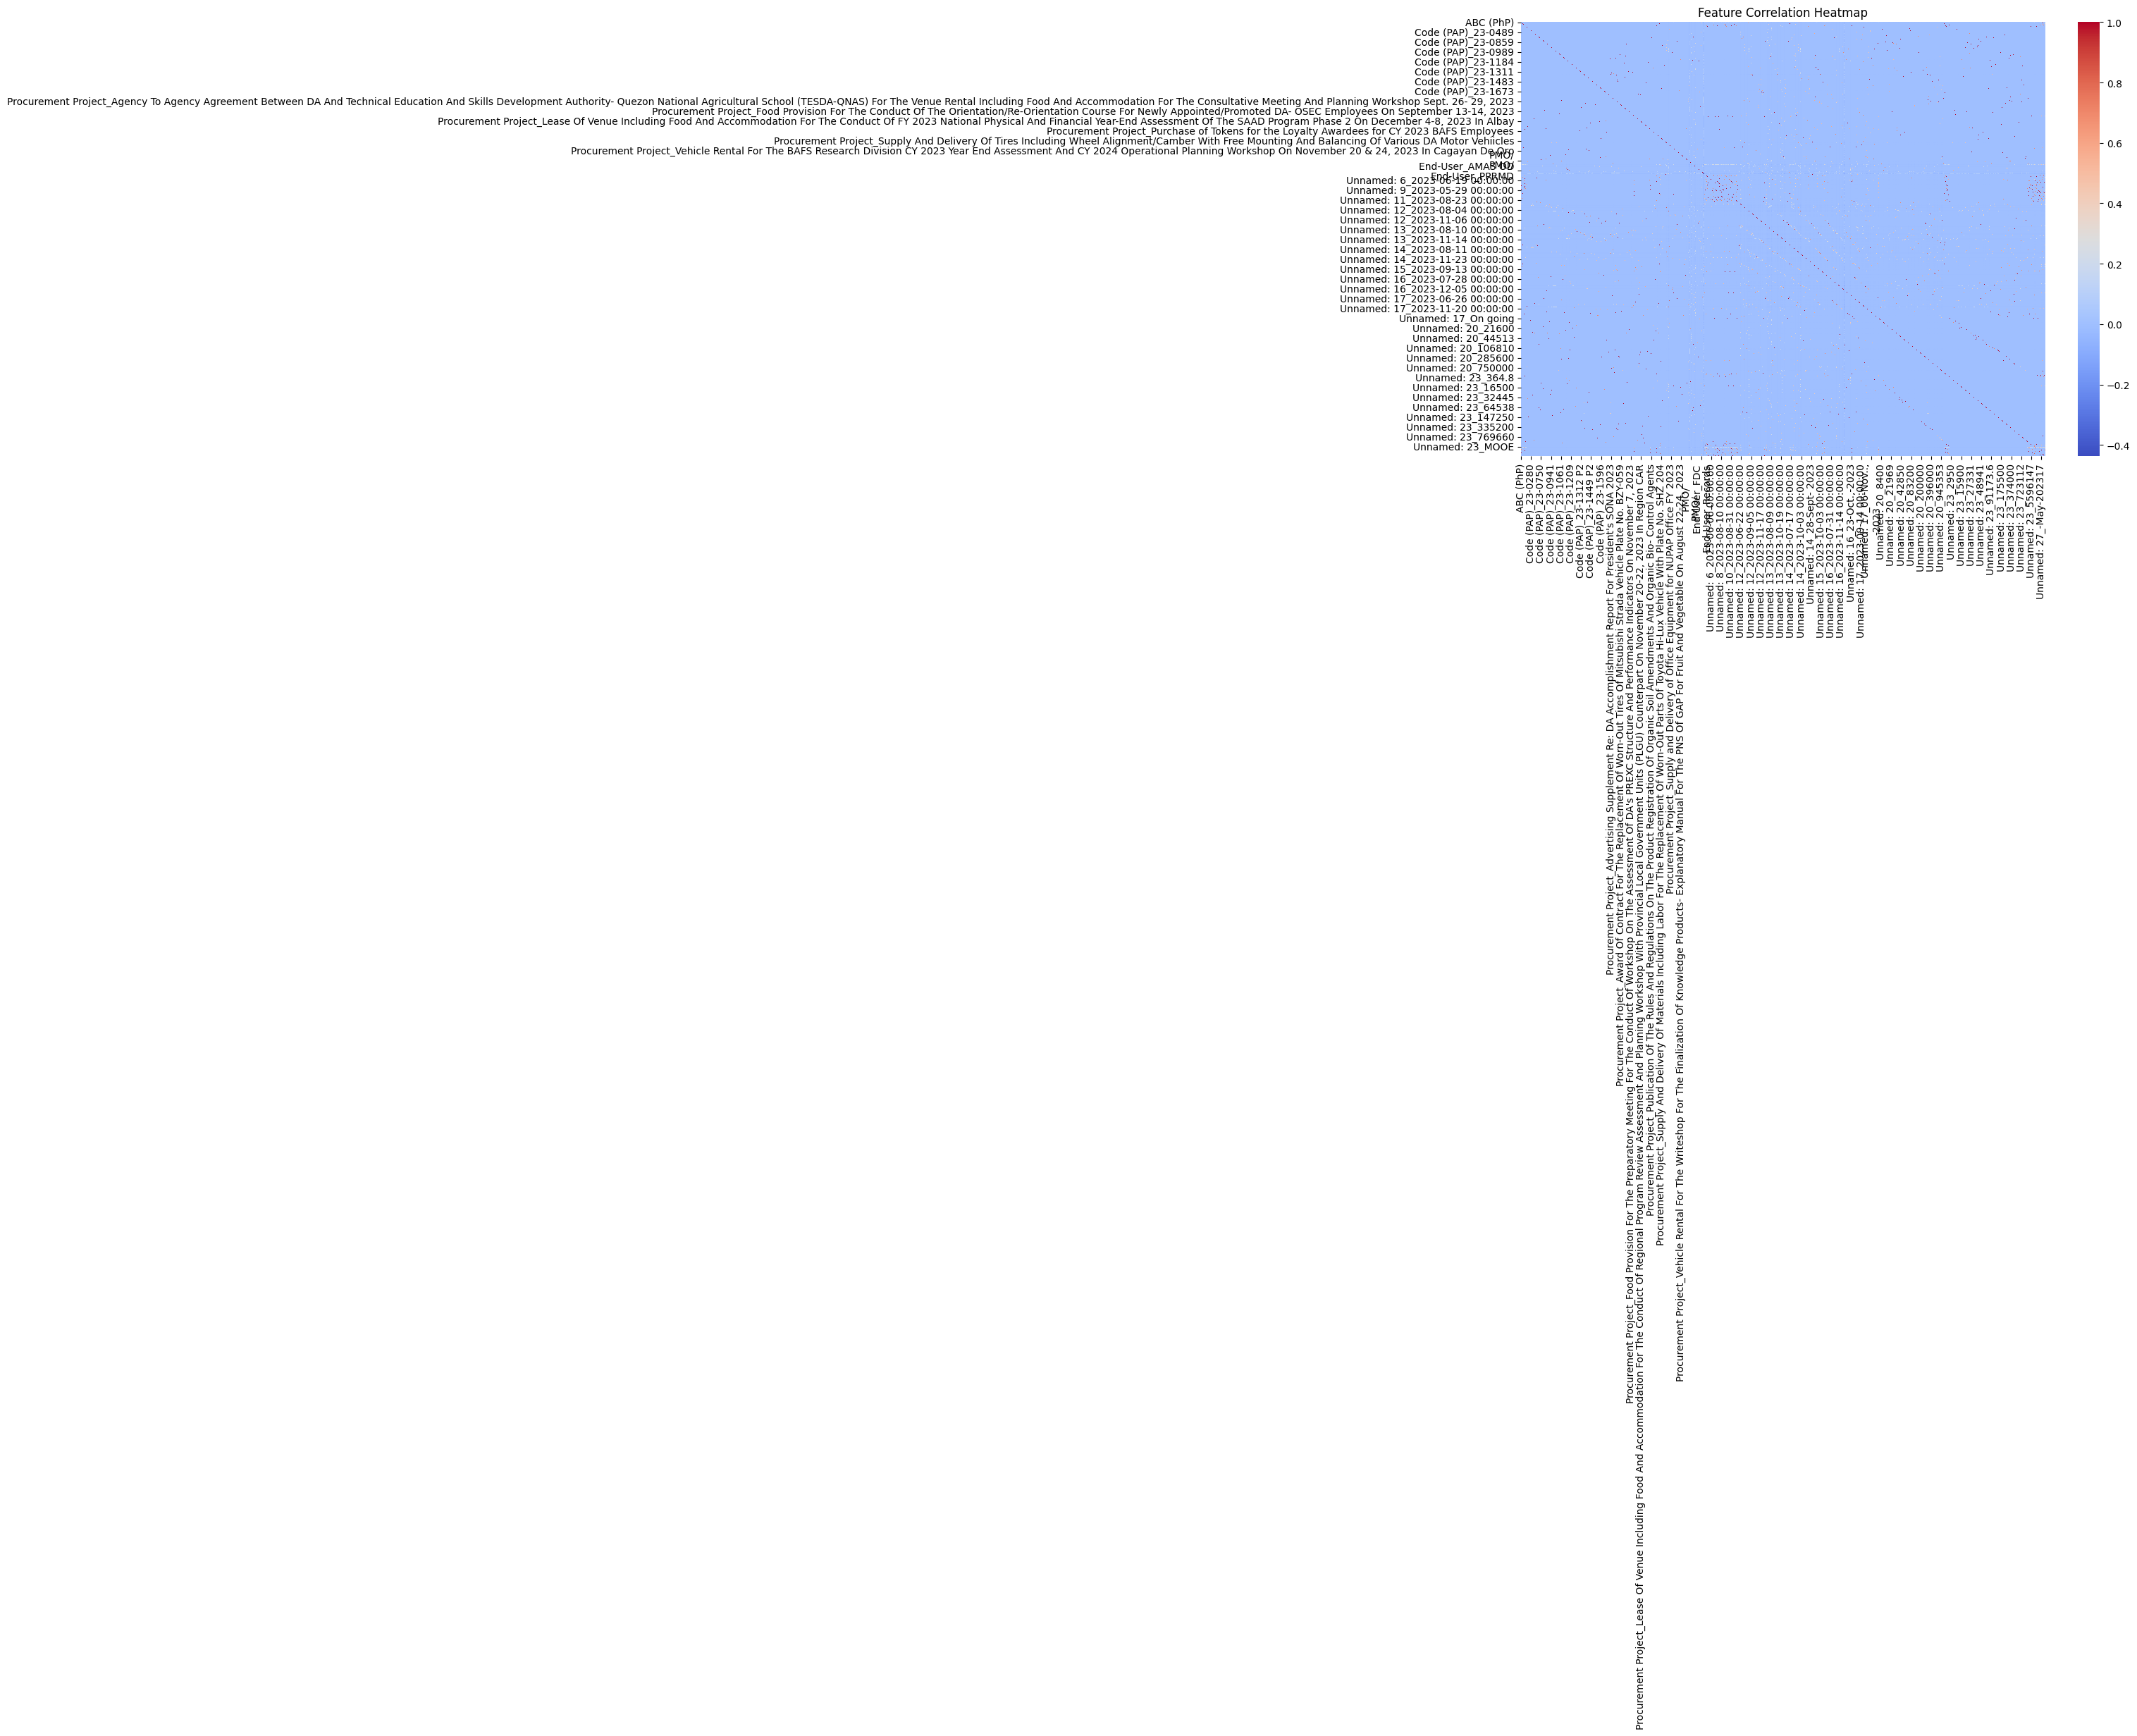

In [67]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Actual vs Predicted Plot

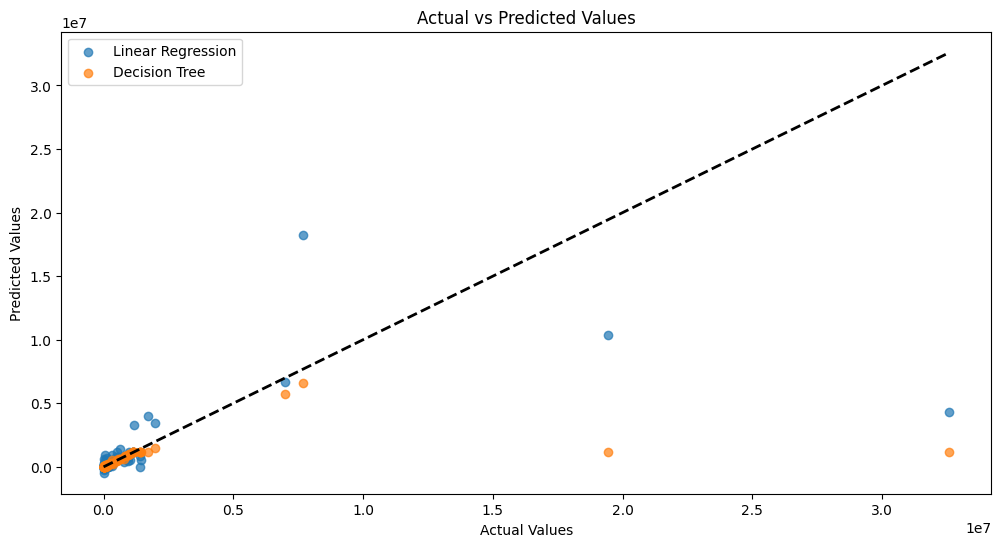

In [68]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_tree, label="Decision Tree", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

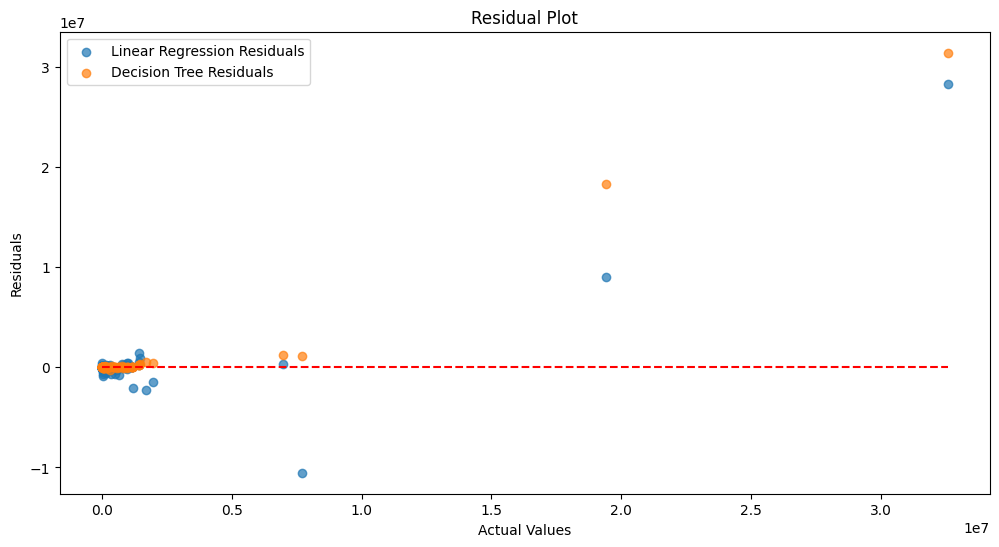

In [69]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test - y_pred_linear, label="Linear Regression Residuals", alpha=0.7)
plt.scatter(y_test, y_test - y_pred_tree, label="Decision Tree Residuals", alpha=0.7)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()